In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
import contractions
import re
import string



In [2]:
df = pd.read_csv('/Users/osheen/Desktop/MSBA/3rd Term/Text Analytics/Final Project/Reviews.csv')

In [3]:
df.shape    

(568454, 10)

In [4]:
# Get the top 10 products with the highest number of reviews
top_products = df['ProductId'].value_counts().nlargest(10).index.tolist()

# Filter the dataframe to only include these top 10 products
df = df[df['ProductId'].isin(top_products)].copy()

# Display the shape of the new dataframe
print(f"Original dataframe shape: {df.shape}")
print(f"Top 10 products dataframe shape: {df.shape}")

# Display the count of reviews for each of the top 10 products
print("\nReview counts for top 10 products:")
print(df['ProductId'].value_counts())

Original dataframe shape: (6323, 10)
Top 10 products dataframe shape: (6323, 10)

Review counts for top 10 products:
B007JFMH8M    913
B002QWP89S    632
B0026RQTGE    632
B002QWHJOU    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B007M83302    564
B000VK8AVK    564
B0026KNQSA    564
Name: ProductId, dtype: int64


In [5]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df['Text']

20982     my 12 year old sheltie has chronic brochotitis...
20983     These are genuine Greenies product, not a knoc...
20984     Our dogs love Greenies, but of course, which d...
20985     What can I say, dogs love greenies. They begg ...
20986     This review is for a box of Greenies Lite for ...
                                ...                        
563878    I loved these cookies and so did my kids. You ...
563879    This is a great tasting cookie. It is very sof...
563880    These are great for a quick snack! They are sa...
563881    I love the Quaker soft baked cookies.  The rea...
563882    This cookie is really good and works really we...
Name: Text, Length: 6323, dtype: object

In [8]:
df['Text'].iloc[2]

"Our dogs love Greenies, but of course, which doggies don't?  I bought this for my dashchund and minpin, and it's perfect!  A great price for a great product.  Who could ask for more."

In [9]:
df['cleaned_text'] = df['Text'].str.lower()

In [10]:
df['cleaned_text'].iloc[2]

"our dogs love greenies, but of course, which doggies don't?  i bought this for my dashchund and minpin, and it's perfect!  a great price for a great product.  who could ask for more."

In [11]:
df['cleaned_text']

20982     my 12 year old sheltie has chronic brochotitis...
20983     these are genuine greenies product, not a knoc...
20984     our dogs love greenies, but of course, which d...
20985     what can i say, dogs love greenies. they begg ...
20986     this review is for a box of greenies lite for ...
                                ...                        
563878    i loved these cookies and so did my kids. you ...
563879    this is a great tasting cookie. it is very sof...
563880    these are great for a quick snack! they are sa...
563881    i love the quaker soft baked cookies.  the rea...
563882    this cookie is really good and works really we...
Name: cleaned_text, Length: 6323, dtype: object

In [12]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<.*?>', '', x))

In [13]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: contractions.fix(str(x)))

In [14]:
df['tokenized'] = df['cleaned_text'].apply(nltk.tokenize.word_tokenize)

In [15]:
df['tokenized']

20982     [my, 12, year, old, sheltie, has, chronic, bro...
20983     [these, are, genuine, greenies, product, ,, no...
20984     [our, dogs, love, greenies, ,, but, of, course...
20985     [what, can, i, say, ,, dogs, love, greenies, ....
20986     [this, review, is, for, a, box, of, greenies, ...
                                ...                        
563878    [i, loved, these, cookies, and, so, did, my, k...
563879    [this, is, a, great, tasting, cookie, ., it, i...
563880    [these, are, great, for, a, quick, snack, !, t...
563881    [i, love, the, quaker, soft, baked, cookies, ....
563882    [this, cookie, is, really, good, and, works, r...
Name: tokenized, Length: 6323, dtype: object

In [16]:
print(df['tokenized'].iloc[2])

['our', 'dogs', 'love', 'greenies', ',', 'but', 'of', 'course', ',', 'which', 'doggies', 'do', 'not', '?', 'i', 'bought', 'this', 'for', 'my', 'dashchund', 'and', 'minpin', ',', 'and', 'it', 'is', 'perfect', '!', 'a', 'great', 'price', 'for', 'a', 'great', 'product', '.', 'who', 'could', 'ask', 'for', 'more', '.']


In [17]:
df[['cleaned_text', 'tokenized']].head()

,cleaned_text,tokenized
20982,my 12 year old sheltie has chronic brochotitis...,"[my, 12, year, old, sheltie, has, chronic, bro..."
20983,"these are genuine greenies product, not a knoc...","[these, are, genuine, greenies, product, ,, no..."
20984,"our dogs love greenies, but of course, which d...","[our, dogs, love, greenies, ,, but, of, course..."
20985,"what can i say, dogs love greenies. they begg ...","[what, can, i, say, ,, dogs, love, greenies, ...."
20986,this review is for a box of greenies lite for ...,"[this, review, is, for, a, box, of, greenies, ..."


In [18]:
df['no_punct'] = df['tokenized'].apply(lambda tokens: [word for word in tokens if word not in string.punctuation])

In [19]:
print(df['no_punct'].iloc[2])

['our', 'dogs', 'love', 'greenies', 'but', 'of', 'course', 'which', 'doggies', 'do', 'not', 'i', 'bought', 'this', 'for', 'my', 'dashchund', 'and', 'minpin', 'and', 'it', 'is', 'perfect', 'a', 'great', 'price', 'for', 'a', 'great', 'product', 'who', 'could', 'ask', 'for', 'more']


In [20]:
df[['tokenized', 'no_punct']].head()


,tokenized,no_punct
20982,"[my, 12, year, old, sheltie, has, chronic, bro...","[my, 12, year, old, sheltie, has, chronic, bro..."
20983,"[these, are, genuine, greenies, product, ,, no...","[these, are, genuine, greenies, product, not, ..."
20984,"[our, dogs, love, greenies, ,, but, of, course...","[our, dogs, love, greenies, but, of, course, w..."
20985,"[what, can, i, say, ,, dogs, love, greenies, ....","[what, can, i, say, dogs, love, greenies, they..."
20986,"[this, review, is, for, a, box, of, greenies, ...","[this, review, is, for, a, box, of, greenies, ..."


In [21]:
df['no_punct'].iloc[0]

['my',
 '12',
 'year',
 'old',
 'sheltie',
 'has',
 'chronic',
 'brochotitis',
 'been',
 'on',
 'meds',
 'for',
 'three',
 'years',
 'these',
 'help',
 'with',
 'the',
 'coughing',
 'fits',
 'at',
 'night',
 'so',
 'i',
 'like',
 'them',
 'one',
 'bite',
 'and',
 'both',
 'my',
 'dogs',
 'are',
 'addicted',
 'be',
 'warned',
 '7',
 'pm',
 'both',
 'shelties',
 'are',
 'on',
 'my',
 'lap',
 'howling',
 'for',
 'the',
 'drug',
 'fix',
 'i',
 'am',
 'a',
 'dog',
 'trainer',
 'and',
 'have',
 'never',
 'seen',
 'anything',
 'like',
 'it',
 '....',
 'three',
 'weeks',
 'later',
 'the',
 'beloved',
 'sheltie',
 'got',
 'a',
 'bowel',
 'blockage',
 'from',
 'these',
 'use',
 'with',
 'caution.if',
 'the',
 'cat',
 'gets',
 'too',
 'many',
 'she',
 'has',
 'the',
 'runs',
 '....',
 'sheltie',
 'did',
 'better',
 'when',
 'i',
 'upped',
 'her',
 'thryoid',
 'meds',
 'and',
 'gave',
 'her',
 'doggie',
 'asthma',
 'meds.so',
 'it',
 'worked',
 'better',
 'for',
 'the',
 '18',
 'year',
 'old',
 'c

In [22]:
stop_words = stopwords.words("english")

In [23]:
df['no_stop'] = df['no_punct'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [24]:
print(df['no_stop'].iloc[2])

['dogs', 'love', 'greenies', 'course', 'doggies', 'bought', 'dashchund', 'minpin', 'perfect', 'great', 'price', 'great', 'product', 'could', 'ask']


In [25]:
df['pos_tags'] = df['no_stop'].apply(nltk.pos_tag)

In [26]:
df['pos_tags'].iloc[0]

[('12', 'CD'),
 ('year', 'NN'),
 ('old', 'JJ'),
 ('sheltie', 'NN'),
 ('chronic', 'JJ'),
 ('brochotitis', 'NN'),
 ('meds', 'NNS'),
 ('three', 'CD'),
 ('years', 'NNS'),
 ('help', 'VBP'),
 ('coughing', 'VBG'),
 ('fits', 'NNS'),
 ('night', 'NN'),
 ('like', 'IN'),
 ('one', 'CD'),
 ('bite', 'JJ'),
 ('dogs', 'NNS'),
 ('addicted', 'VBD'),
 ('warned', 'VBD'),
 ('7', 'CD'),
 ('pm', 'NN'),
 ('shelties', 'NNS'),
 ('lap', 'VBP'),
 ('howling', 'VBG'),
 ('drug', 'NN'),
 ('fix', 'NN'),
 ('dog', 'NN'),
 ('trainer', 'NN'),
 ('never', 'RB'),
 ('seen', 'VBN'),
 ('anything', 'NN'),
 ('like', 'IN'),
 ('....', 'NNP'),
 ('three', 'CD'),
 ('weeks', 'NNS'),
 ('later', 'RB'),
 ('beloved', 'VBD'),
 ('sheltie', 'JJ'),
 ('got', 'VBD'),
 ('bowel', 'JJ'),
 ('blockage', 'NN'),
 ('use', 'NN'),
 ('caution.if', 'NN'),
 ('cat', 'NN'),
 ('gets', 'VBZ'),
 ('many', 'JJ'),
 ('runs', 'NNS'),
 ('....', 'VBP'),
 ('sheltie', 'RB'),
 ('better', 'RB'),
 ('upped', 'JJ'),
 ('thryoid', 'JJ'),
 ('meds', 'NNS'),
 ('gave', 'VBD'),
 ('dog

In [27]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ  # adjective → 'a'
    elif tag.startswith('V'):
        return wordnet.VERB  # verb → 'v'
    elif tag.startswith('N'):
        return wordnet.NOUN  # noun → 'n'
    elif tag.startswith('R'):
        return wordnet.ADV  # adverb → 'r'
    else:
        return wordnet.NOUN  # default to noun

In [28]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['pos_tags'].apply(lambda tagged_tokens: [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens])


In [29]:
#df['lemmatized'] = df['no_stop'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [30]:
print(df['lemmatized'].iloc[2])

['dog', 'love', 'greenies', 'course', 'doggy', 'buy', 'dashchund', 'minpin', 'perfect', 'great', 'price', 'great', 'product', 'could', 'ask']


In [31]:
df['final_tokens'] = df['lemmatized'].apply(lambda tokens: [w for w in tokens if w.isalpha()])


In [32]:
print(df['final_tokens'].iloc[2])

['dog', 'love', 'greenies', 'course', 'doggy', 'buy', 'dashchund', 'minpin', 'perfect', 'great', 'price', 'great', 'product', 'could', 'ask']


# Focusing on the Dog Product


In [33]:
# Filter the dataframe to only include product B007JFMH8M
df = df[df['ProductId'].isin(['B002QWP89S',
'B0026RQTGE',
'B002QWHJOU',
'B002QWP8H0'
#'B003B3OOPA',
#'B001EO5Q64',
#'B007M83302',
#'B000VK8AVK',
#'B0026KNQSA'
])].copy()

# Check how many reviews we have for this product
print(f"Number of reviews for products : {len(df)}")

# Assuming you have a column with tokenized and processed words
# If you're using the 'final_tokens' column (or similar processed tokens column)
all_words_product = []
for tokens in df['final_tokens']:  # Replace 'final_tokens' with your actual column name
    all_words_product.extend(tokens)

# Create frequency distribution for this product only
freq_dist_product = FreqDist(all_words_product)

# Display the 10 most common words for this product
print("Most common words for products:")
freq_dist_product.most_common(10)

Number of reviews for products : 2528
Most common words for products:


[('dog', 3224),
 ('greenies', 1916),
 ('love', 1604),
 ('treat', 1248),
 ('teeth', 1236),
 ('get', 1172),
 ('one', 988),
 ('give', 796),
 ('product', 752),
 ('great', 712)]

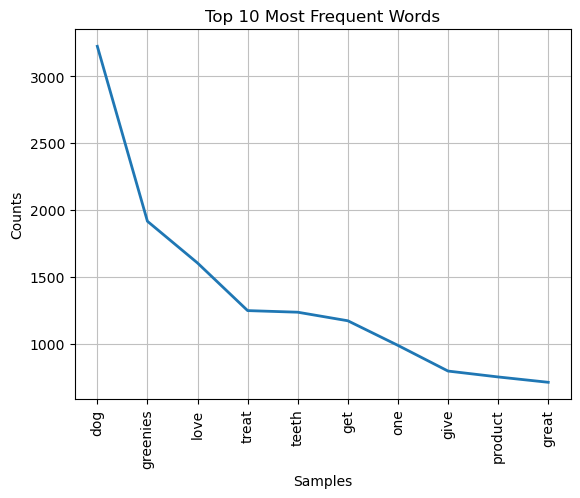

<Axes: title={'center': 'Top 10 Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [34]:
import matplotlib.pyplot as plt

freq_dist_product.plot(10, title="Top 10 Most Frequent Words")


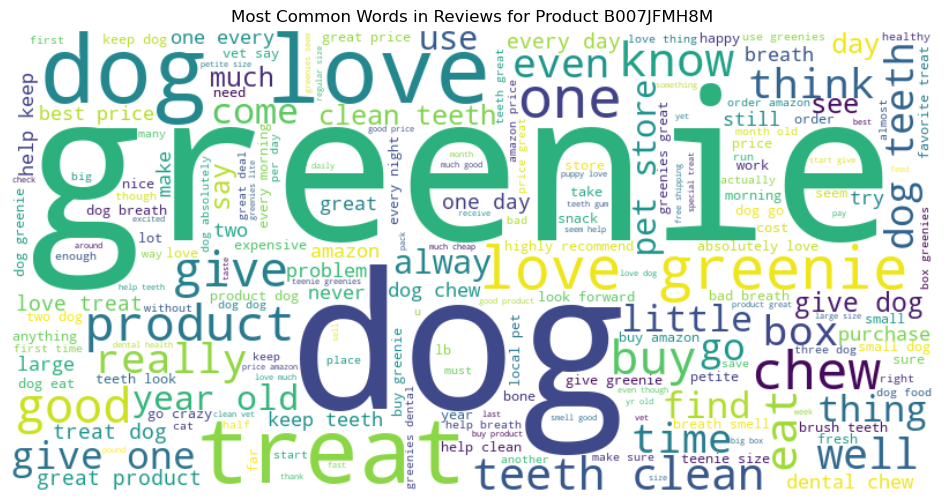

In [35]:
from wordcloud import WordCloud
# Collect all words from this product's processed tokens
all_words_product = []
for tokens in df['final_tokens']:  # Replace with your actual column name
    all_words_product.extend(tokens)

# Create word cloud for this product only
wordcloud_product = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words_product))

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_product, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews for Product B007JFMH8M')
plt.show()

# Phase 1: Frequency by Rating
## What words do people use in 1-star vs. 5-star reviews?

### This helps us understand what makes customers unhappy vs happy.

In [36]:
df_5 = df[df['Score'] == 5]
df_1 = df[df['Score'] == 1]


In [37]:
df_5.shape


(1992, 17)

In [38]:
df_1.shape

(108, 17)

In [39]:
words_5 = [word for tokens in df_5['final_tokens'] for word in tokens]
words_1 = [word for tokens in df_1['final_tokens'] for word in tokens]


In [40]:
fdist_5 = FreqDist(words_5)
fdist_1 = FreqDist(words_1)


In [41]:
print("Top 10 words in 5-star reviews:")
print(fdist_5.most_common(10))

print("\nTop 10 words in 1-star reviews:")
print(fdist_1.most_common(10))


Top 10 words in 5-star reviews:
[('dog', 2276), ('greenies', 1404), ('love', 1372), ('teeth', 1020), ('treat', 972), ('get', 940), ('one', 768), ('great', 648), ('price', 572), ('give', 528)]

Top 10 words in 1-star reviews:
[('dog', 268), ('greenies', 172), ('product', 128), ('give', 72), ('treat', 64), ('greenie', 56), ('get', 56), ('pet', 56), ('eat', 48), ('buy', 44)]


In [42]:
top_5 = dict(fdist_5.most_common(20))
top_1 = dict(fdist_1.most_common(20))


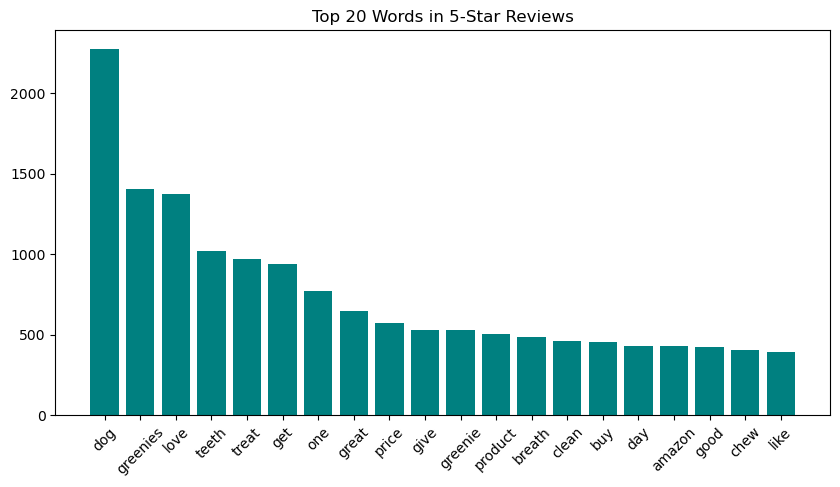

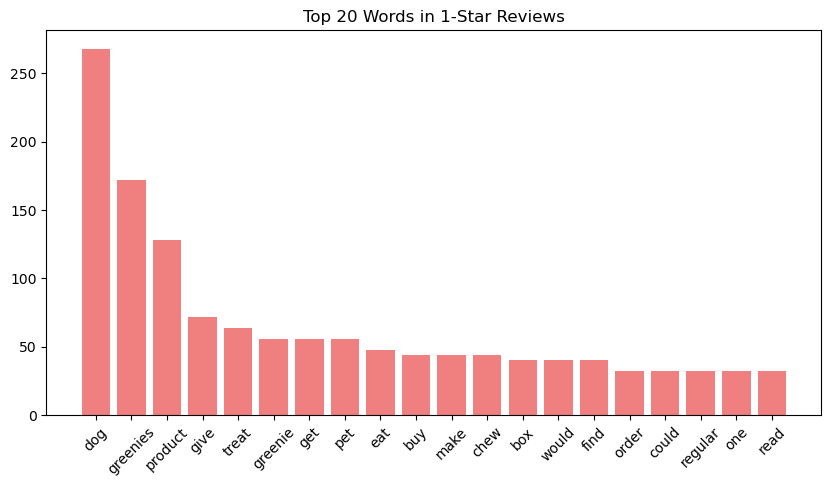

In [43]:


# Plot for 5-star
plt.figure(figsize=(10,5))
plt.bar(top_5.keys(), top_5.values(), color='teal')
plt.title("Top 20 Words in 5-Star Reviews")
plt.xticks(rotation=45)
plt.show()

# Plot for 1-star
plt.figure(figsize=(10,5))
plt.bar(top_1.keys(), top_1.values(), color='lightcoral')
plt.title("Top 20 Words in 1-Star Reviews")
plt.xticks(rotation=45)
plt.show()


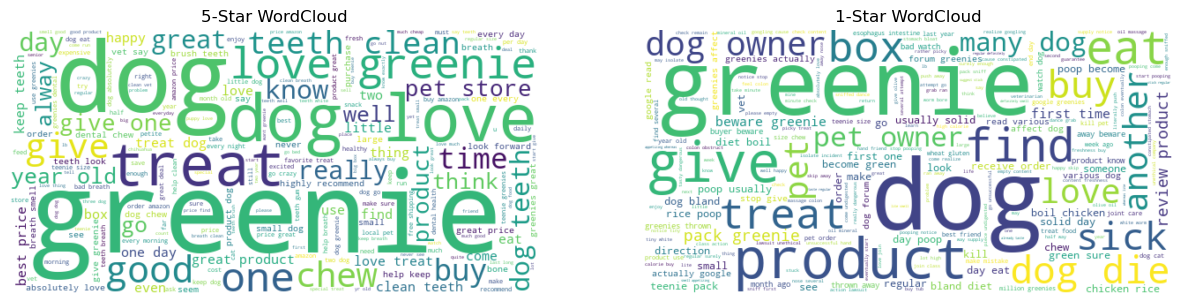

In [44]:


# Create word clouds
wc_5 = WordCloud(width=600, height=300, background_color='white').generate(' '.join(words_5))
wc_1 = WordCloud(width=600, height=300, background_color='white').generate(' '.join(words_1))

# Plot side by side
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.imshow(wc_5, interpolation='bilinear')
plt.axis('off')
plt.title("5-Star WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wc_1, interpolation='bilinear')
plt.axis('off')
plt.title("1-Star WordCloud")

plt.show()


In [45]:


# Get vocab from both
common_words = set(fdist_1.keys()).intersection(set(fdist_5.keys()))

# Keep words with decent frequency to avoid flukes
min_count = 30
filtered_words = [w for w in common_words if fdist_1[w] >= min_count and fdist_5[w] >= min_count]

# Compute ratios
word_ratios = []
for word in filtered_words:
    ratio = fdist_1[word] / fdist_5[word]
    word_ratios.append((word, ratio))

# Convert to DataFrame
ratio_df = pd.DataFrame(word_ratios, columns=['word', 'ratio'])

# Sort
top_negative_words = ratio_df.sort_values(by='ratio', ascending=False).head(15)
top_positive_words = ratio_df.sort_values(by='ratio', ascending=True).head(15)


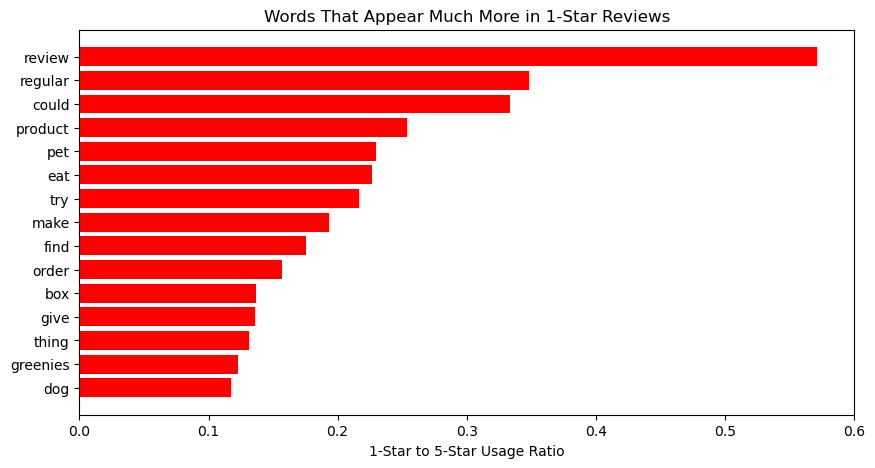

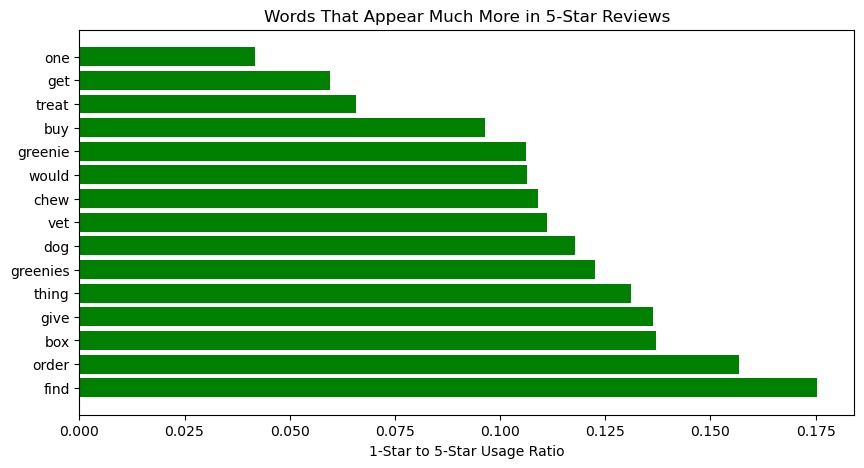

In [46]:
plt.figure(figsize=(10, 5))
plt.barh(top_negative_words['word'], top_negative_words['ratio'], color='red')
plt.title("Words That Appear Much More in 1-Star Reviews")
plt.xlabel("1-Star to 5-Star Usage Ratio")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_positive_words['word'], top_positive_words['ratio'], color='green')
plt.title("Words That Appear Much More in 5-Star Reviews")
plt.xlabel("1-Star to 5-Star Usage Ratio")
plt.gca().invert_yaxis()
plt.show()


In [47]:
from nltk.util import ngrams  # This lets us generate bigrams, trigrams, etc.
from collections import Counter  # Like a frequency dictionary


In [48]:
def get_ngrams(token_lists, n=2):
    ngram_list = []
    for tokens in token_lists:  # loop through each review
        ngram_list.extend(ngrams(tokens, n))  # get all n-grams from the review
    return Counter(ngram_list)  # count how often each one appears
 

In [49]:
bigrams_5 = get_ngrams(df_5['final_tokens'], n=2)
bigrams_1 = get_ngrams(df_1['final_tokens'], n=2)


In [50]:
print(bigrams_5.most_common(10))
print(bigrams_1.most_common(10))


[(('dog', 'love'), 520), (('love', 'greenies'), 336), (('teeth', 'clean'), 212), (('dog', 'teeth'), 148), (('pet', 'store'), 128), (('give', 'one'), 128), (('get', 'one'), 128), (('year', 'old'), 120), (('great', 'product'), 108), (('clean', 'teeth'), 100)]
[(('give', 'dog'), 16), (('dog', 'greenies'), 16), (('dog', 'die'), 16), (('eat', 'greenie'), 12), (('make', 'dog'), 12), (('dog', 'owner'), 12), (('pet', 'owner'), 12), (('many', 'dog'), 12), (('review', 'product'), 12), (('first', 'time'), 12)]


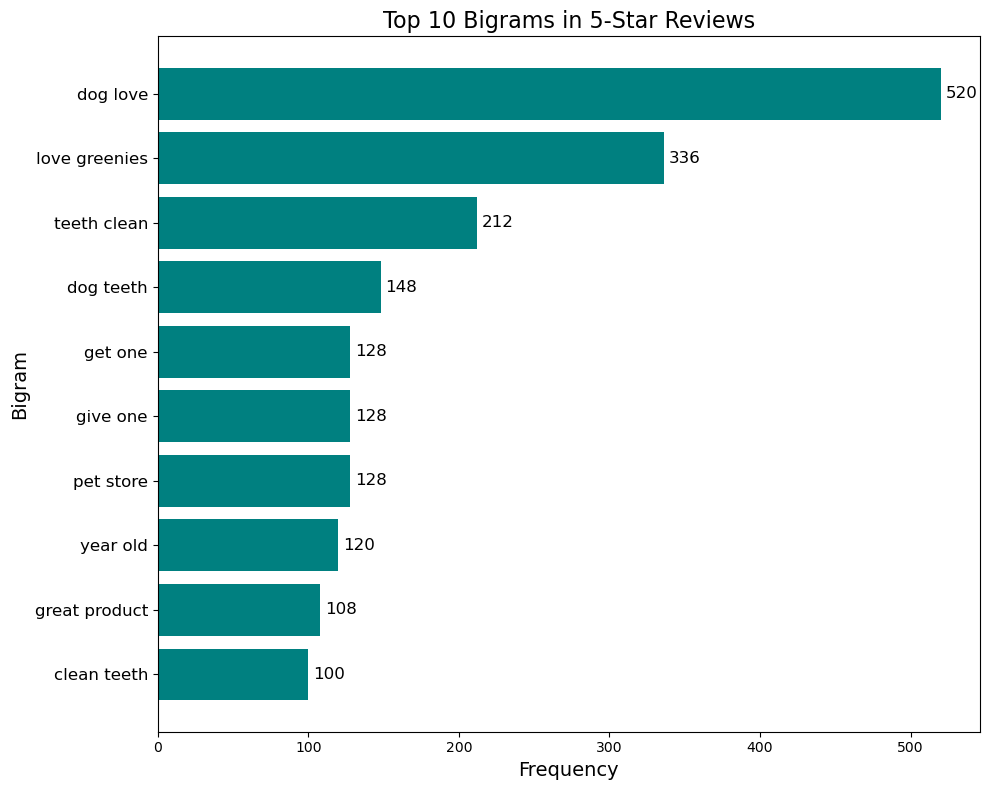

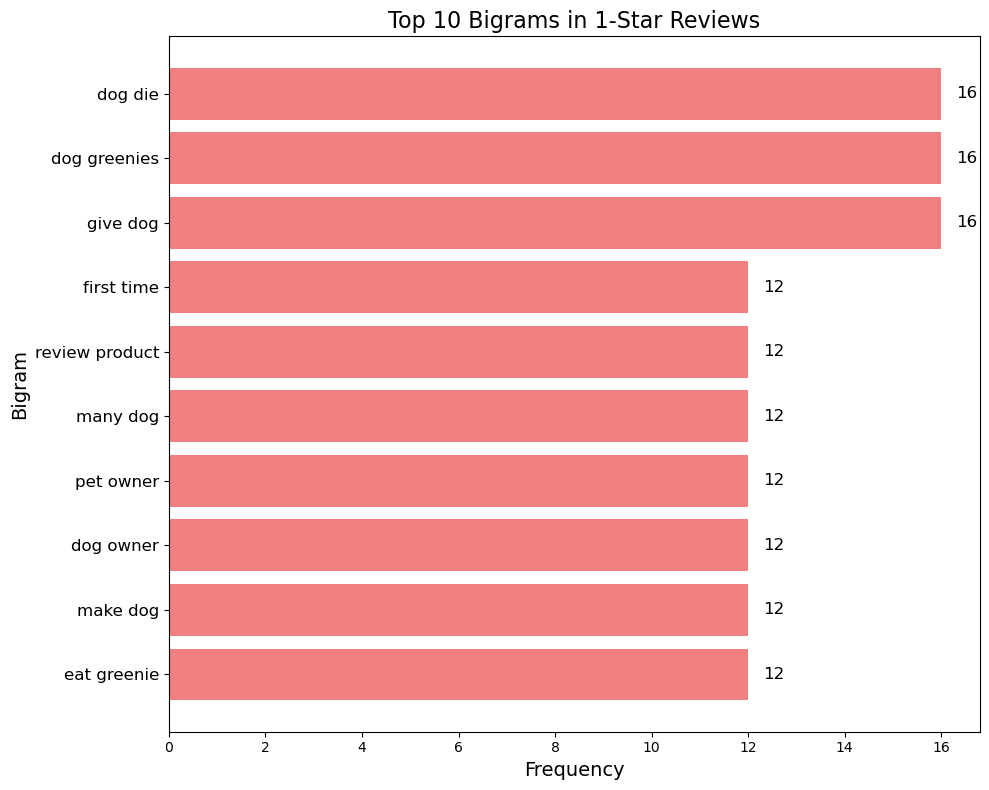

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the bigram tuples to readable strings and create DataFrames
positive_bigrams = [(f"{a} {b}", count) for ((a, b), count) in bigrams_5.most_common(10)]
negative_bigrams = [(f"{a} {b}", count) for ((a, b), count) in bigrams_1.most_common(10)]

df_pos = pd.DataFrame(positive_bigrams, columns=['Bigram', 'Frequency']).sort_values('Frequency')
df_neg = pd.DataFrame(negative_bigrams, columns=['Bigram', 'Frequency']).sort_values('Frequency')

# Create plot for positive bigrams
plt.figure(figsize=(10, 8))
bars_pos = plt.barh(df_pos['Bigram'], df_pos['Frequency'], color='teal')
plt.title('Top 10 Bigrams in 5-Star Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigram', fontsize=14)
plt.tick_params(axis='y', labelsize=12)

# Add frequency labels
for bar in bars_pos:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Create plot for negative bigrams
plt.figure(figsize=(10, 8))
bars_neg = plt.barh(df_neg['Bigram'], df_neg['Frequency'], color='lightcoral')
plt.title('Top 10 Bigrams in 1-Star Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigram', fontsize=14)
plt.tick_params(axis='y', labelsize=12)

# Add frequency labels
for bar in bars_neg:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [52]:
trigrams_5 = get_ngrams(df_5['final_tokens'], n=3)
trigrams_1 = get_ngrams(df_1['final_tokens'], n=3)
print(trigrams_5.most_common(10))
print(trigrams_1.most_common(10))

[(('dog', 'love', 'greenies'), 140), (('keep', 'teeth', 'clean'), 52), (('dog', 'love', 'treat'), 48), (('one', 'every', 'day'), 44), (('product', 'dog', 'love'), 32), (('love', 'greenies', 'get'), 32), (('get', 'one', 'every'), 32), (('dog', 'absolutely', 'love'), 32), (('local', 'pet', 'store'), 28), (('dog', 'teeth', 'clean'), 28)]
[(('give', 'dog', 'greenies'), 12), (('dog', 'bland', 'diet'), 8), (('bland', 'diet', 'boil'), 8), (('diet', 'boil', 'chicken'), 8), (('boil', 'chicken', 'rice'), 8), (('chicken', 'rice', 'poop'), 8), (('rice', 'poop', 'usually'), 8), (('poop', 'usually', 'solid'), 8), (('usually', 'solid', 'day'), 8), (('solid', 'day', 'eat'), 8)]


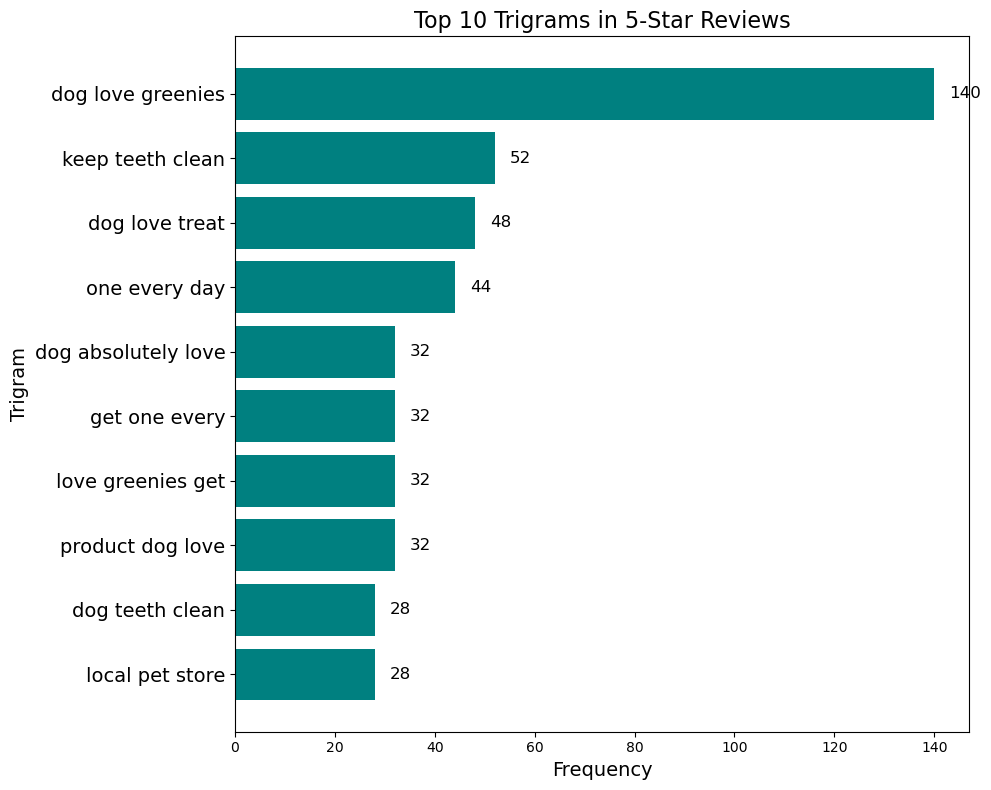

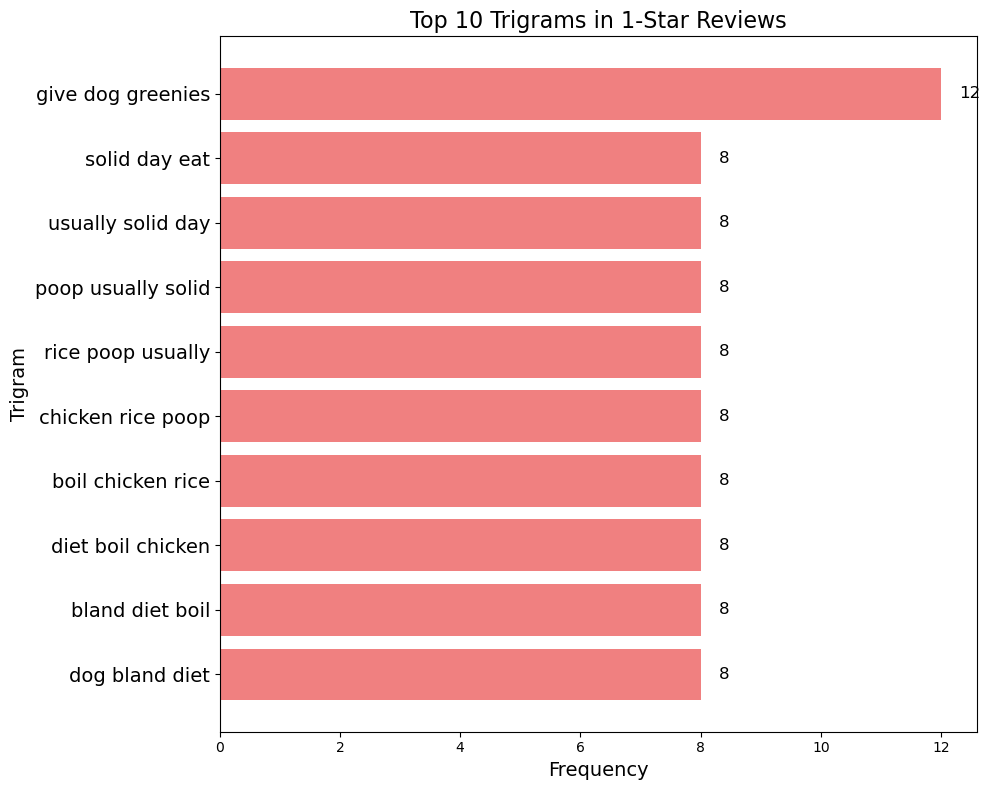

In [53]:

# Convert the trigram tuples to readable strings and create DataFrames
positive_trigrams = [(f"{a} {b} {c}", count) for ((a, b, c), count) in trigrams_5.most_common(10)]
negative_trigrams = [(f"{a} {b} {c}", count) for ((a, b, c), count) in trigrams_1.most_common(10)]

df_pos = pd.DataFrame(positive_trigrams, columns=['Trigram', 'Frequency']).sort_values('Frequency')
df_neg = pd.DataFrame(negative_trigrams, columns=['Trigram', 'Frequency']).sort_values('Frequency')

# Create plot for positive trigrams
plt.figure(figsize=(10, 8))
bars_pos = plt.barh(df_pos['Trigram'], df_pos['Frequency'], color='teal')
plt.title('Top 10 Trigrams in 5-Star Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Trigram', fontsize=14)
plt.tick_params(axis='y', labelsize=14)

# Add frequency labels
for bar in bars_pos:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Create plot for negative trigrams
plt.figure(figsize=(10, 8))
bars_neg = plt.barh(df_neg['Trigram'], df_neg['Frequency'], color='lightcoral')
plt.title('Top 10 Trigrams in 1-Star Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Trigram', fontsize=14)
plt.tick_params(axis='y', labelsize=14)

# Add frequency labels
for bar in bars_neg:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

##### What can be done next:
##### Use these phrases for classification
##### "would never buy" → 🚨 likely 1-star
##### "highly recommend" → 🌟 5-star
##### Create WordClouds of bigrams/trigrams
##### Cluster reviews based on top phrases
##### Export keywords for business, marketing, or QA teams

# Phase 2: Sentiment Analysis

In [54]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'cleaned_text', 'tokenized', 'no_punct', 'no_stop', 'pos_tags',
       'lemmatized', 'final_tokens'],
      dtype='object')

In [55]:
import re


# Expand contractions + remove <br> tags, extra spaces, etc.
df['sentiment_text'] = df['Text'].apply(lambda x: contractions.fix(str(x)))
df['sentiment_text'] = df['sentiment_text'].apply(lambda x: re.sub(r'<.*?>', '', x))  # remove HTML
df['sentiment_text'] = df['sentiment_text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s.,!?\'"]+', '', x))  # keep basic punctuations
df['sentiment_text'] = df['sentiment_text'].str.lower()



In [56]:
df['sentiment_text'].iloc[0]


'my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so i like them!!! one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! i am a dog trainer and have never seen  anything like it....three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.if the cat gets too many she has the runs....sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.so it worked better for the 18 year old cat, who also has asthma.'

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['sentiment_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


In [58]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


In [59]:
df['sentiment_label'].value_counts(normalize=True)


Positive    0.905063
Negative    0.080696
Neutral     0.014241
Name: sentiment_label, dtype: float64

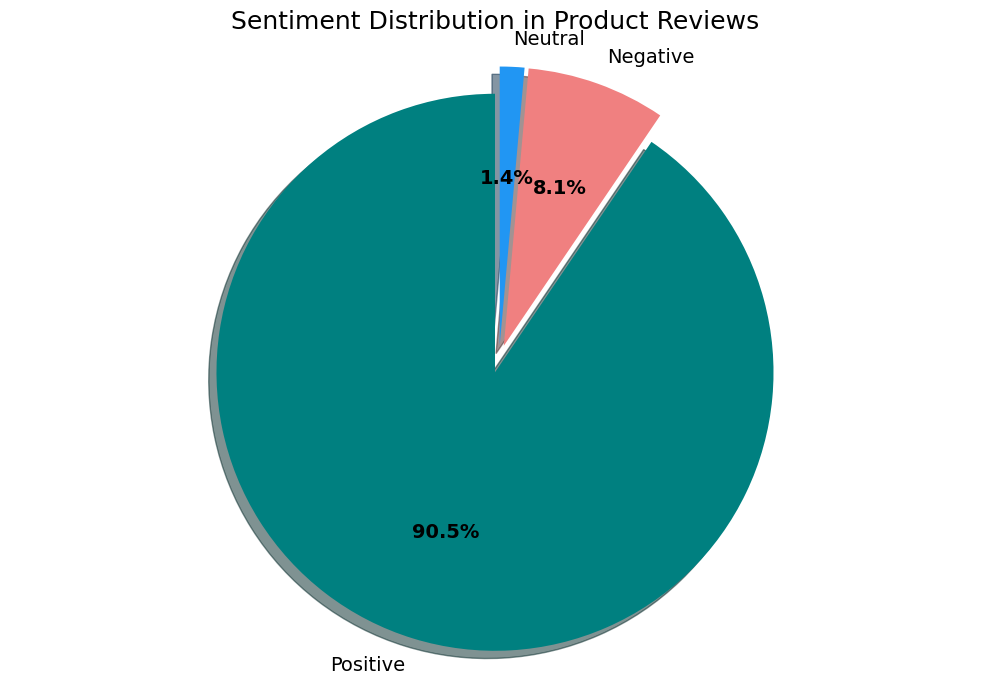

In [60]:
from sentiment_pie_chart import create_sentiment_pie_chart

# Create and display the pie chart
fig = create_sentiment_pie_chart(df)

In [61]:
pd.crosstab(df['Score'], df['sentiment_label'], normalize='index') * 100


sentiment_label,Negative,Neutral,Positive
Score,,,
1,62.962963,3.703704,33.333333
2,8.333333,25.000000,66.666667
3,33.333333,0.000000,66.666667
4,9.459459,0.000000,90.540541
5,3.815261,1.004016,95.180723


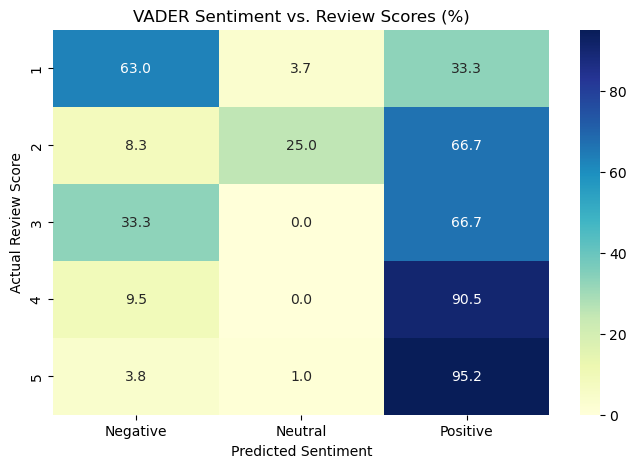

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(df['Score'], df['sentiment_label'], normalize='index') * 100

plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("VADER Sentiment vs. Review Scores (%)")
plt.ylabel("Actual Review Score")
plt.xlabel("Predicted Sentiment")
plt.show()


In [63]:
misclassified_positives = df[(df['Score'] == 1) & (df['sentiment_label'] == 'Negative')]


In [64]:
misclassified_positives['sentiment_text'].iloc[1]


"i bought this for my dog  he loved it.  however, i noticed that he stopped pooping and came to realize after googling that it caused him to be constipated.  his stomach was very bloated and i could feel that his colon was obstructed by something  a piece of undigested greenies treat.  i gave him all some olive oil and mineral oil and massaged his colon and eventually he started pooping again.  i did notice that the greenie came out undigested!  this product is really dangerous and i would love to join in on a class action lawsuit against this unethical company.  they have made greenies 'tasty' but that is all it is.  a tasty but dangerous product."

In [65]:
top_products = df['ProductId'].value_counts().head(10).index.tolist()
top_products

['B002QWP89S', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP8H0']

In [66]:
df_top10 = df[df['ProductId'].isin(top_products)].copy()
df_top10.shape

(2528, 20)

In [67]:
df_top10['ProductId'].value_counts()

B002QWP89S    632
B0026RQTGE    632
B002QWHJOU    632
B002QWP8H0    632
Name: ProductId, dtype: int64

In [68]:
pd.crosstab(df_top10['ProductId'], df_top10['sentiment_label'], normalize='index') * 100


sentiment_label,Negative,Neutral,Positive
ProductId,,,
B0026RQTGE,8.06962,1.424051,90.506329
B002QWHJOU,8.06962,1.424051,90.506329
B002QWP89S,8.06962,1.424051,90.506329
B002QWP8H0,8.06962,1.424051,90.506329


In [69]:
from gensim import corpora
from gensim.models import LdaModel

# Get top 5 products from the already-filtered top 10 DataFrame
top5_products = df_top10['ProductId'].value_counts().head(5).index.tolist()

# Loop through each top product
for pid in top5_products:
    print(f"🟢 Product: {pid} — 5-Star Topics")
    rev_5 = df_top10[(df_top10['ProductId'] == pid) & (df_top10['Score'] == 5)]['final_tokens']
    dict_5 = corpora.Dictionary(rev_5)
    corpus_5 = [dict_5.doc2bow(text) for text in rev_5]
    lda_5 = LdaModel(corpus=corpus_5, id2word=dict_5, num_topics=5, passes=10, random_state=42)
    for i, topic in lda_5.print_topics(num_words=6):
        print(f"  Topic {i+1}: {topic}")

    print(f"\n🔴 Product: {pid} — 1-Star Topics")
    rev_1 = df_top10[(df_top10['ProductId'] == pid) & (df_top10['Score'] == 1)]['final_tokens']
    dict_1 = corpora.Dictionary(rev_1)
    corpus_1 = [dict_1.doc2bow(text) for text in rev_1]

    if corpus_1:  # Avoid crash if no 1-star reviews for this product
        lda_1 = LdaModel(corpus=corpus_1, id2word=dict_1, num_topics=5, passes=10, random_state=42)
        for i, topic in lda_1.print_topics(num_words=6):
            print(f"  Topic {i+1}: {topic}")
    else:
        print("  No 1-star reviews available.")

    print("\n" + "-"*80 + "\n")


🟢 Product: B002QWP89S — 5-Star Topics
  Topic 1: 0.046*"dog" + 0.025*"teeth" + 0.021*"one" + 0.021*"love" + 0.021*"greenies" + 0.019*"get"
  Topic 2: 0.027*"greenies" + 0.016*"teeth" + 0.014*"dog" + 0.014*"love" + 0.013*"product" + 0.012*"old"
  Topic 3: 0.045*"dog" + 0.033*"love" + 0.024*"greenies" + 0.021*"treat" + 0.018*"great" + 0.017*"price"
  Topic 4: 0.025*"greenies" + 0.022*"treat" + 0.021*"love" + 0.020*"dog" + 0.014*"get" + 0.009*"bone"
  Topic 5: 0.038*"dog" + 0.025*"greenies" + 0.024*"love" + 0.021*"treat" + 0.019*"teeth" + 0.016*"get"

🔴 Product: B002QWP89S — 1-Star Topics
  Topic 1: 0.029*"dog" + 0.024*"eat" + 0.020*"thing" + 0.016*"try" + 0.012*"box" + 0.012*"else"
  Topic 2: 0.027*"product" + 0.019*"dog" + 0.014*"wheat" + 0.014*"vendor" + 0.014*"purchase" + 0.011*"allergy"
  Topic 3: 0.025*"dog" + 0.021*"product" + 0.013*"many" + 0.013*"greenie" + 0.013*"pug" + 0.009*"chew"
  Topic 4: 0.029*"dog" + 0.024*"greenies" + 0.016*"product" + 0.016*"treat" + 0.012*"pet" + 0.012

Analyzing combined reviews for products: B002QWP89S, B0026RQTGE, B002QWHJOU, B002QWP8H0
Total reviews: 2528
Positive reviews: 2288
Negative reviews: 204

🟢 Positive Reviews Topics (All 4 Products)
  Topic 1: 0.042*"dog" + 0.024*"greenies" + 0.019*"product" + 0.018*"love" + 0.017*"price" + 0.017*"great" + 0.015*"amazon" + 0.015*"one" + 0.014*"buy" + 0.013*"get"
  Topic 2: 0.046*"dog" + 0.024*"greenies" + 0.024*"get" + 0.022*"treat" + 0.020*"love" + 0.013*"chew" + 0.012*"one" + 0.010*"give" + 0.010*"size" + 0.009*"product"
  Topic 3: 0.041*"dog" + 0.037*"teeth" + 0.030*"love" + 0.030*"greenies" + 0.020*"treat" + 0.017*"clean" + 0.016*"one" + 0.014*"give" + 0.013*"breath" + 0.013*"would"

🔴 Negative Reviews Topics (All 4 Products)
  Topic 1: 0.044*"dog" + 0.028*"greenies" + 0.016*"day" + 0.016*"bad" + 0.015*"breath" + 0.013*"one" + 0.011*"time" + 0.011*"give" + 0.010*"get" + 0.010*"try"
  Topic 2: 0.043*"dog" + 0.017*"greenies" + 0.016*"product" + 0.015*"thing" + 0.015*"know" + 0.014*"buy

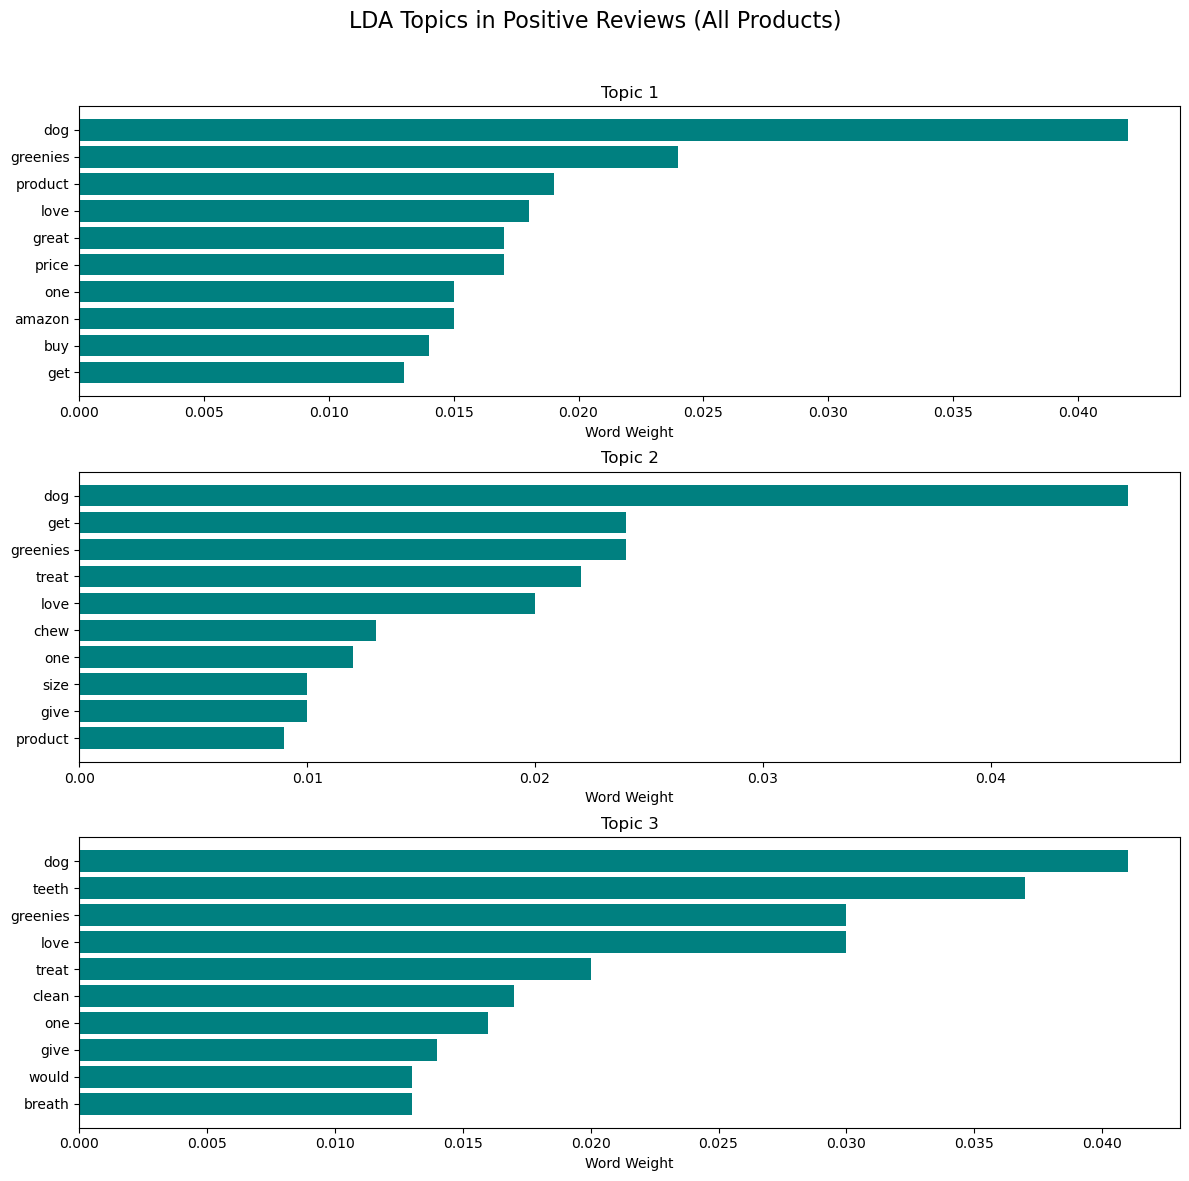

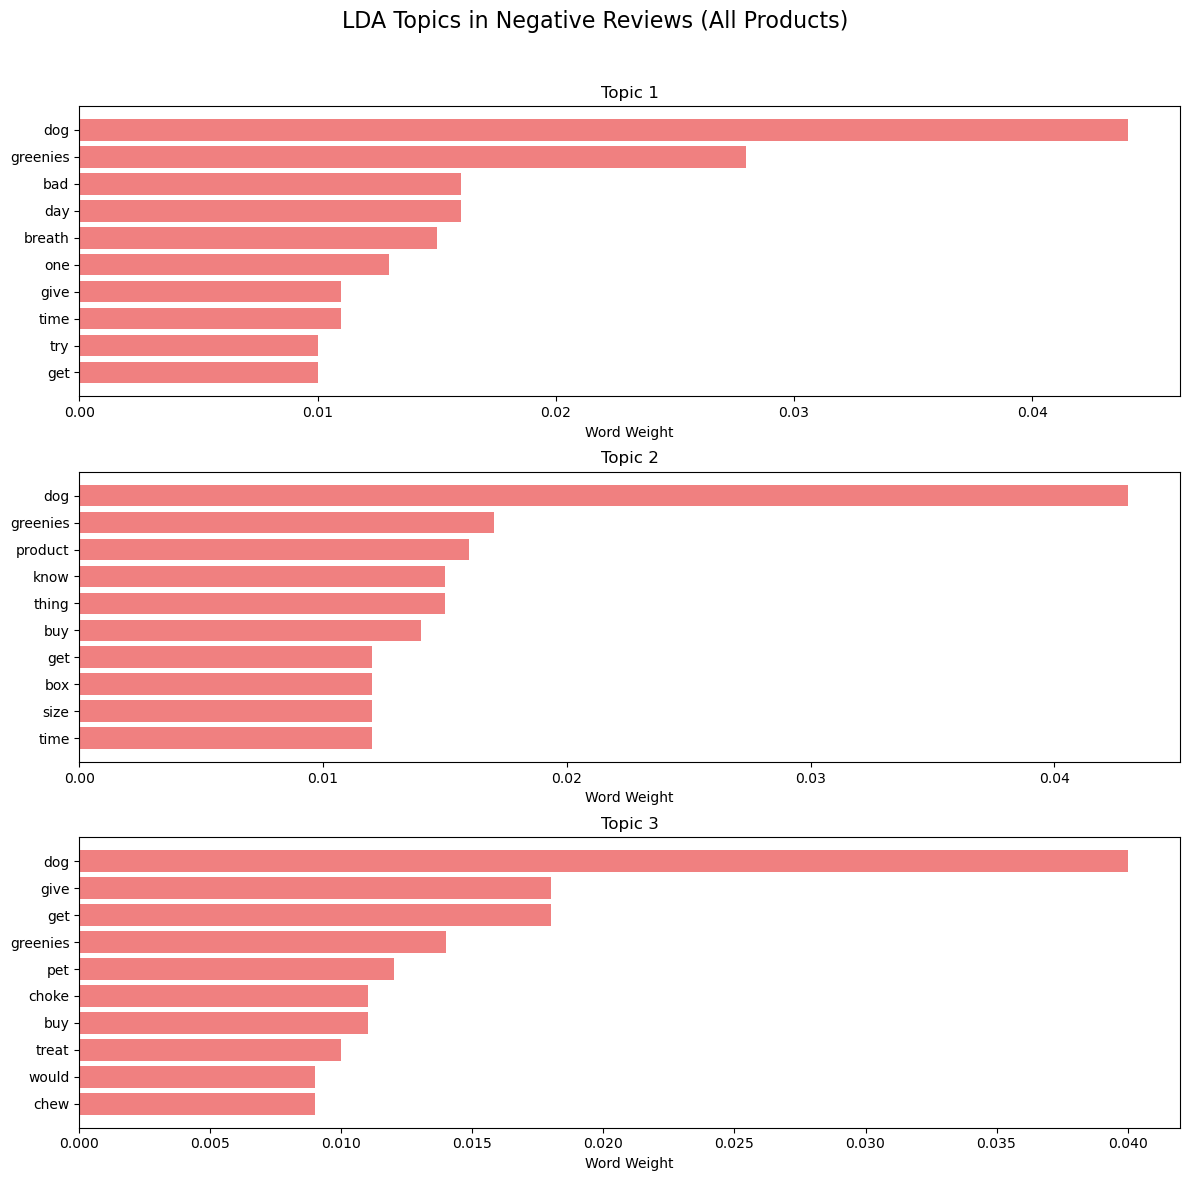

In [70]:
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import numpy as np

# List of product IDs to analyze
product_ids = ['B002QWP89S', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP8H0']

# Filter for just these 4 products
df_products = df_top10[df_top10['ProductId'].isin(product_ids)]

# Separate by sentiment using only sentiment_label
print("Analyzing combined reviews for products:", ", ".join(product_ids))
print(f"Total reviews: {len(df_products)}")

# For positive and negative reviews using sentiment_label
pos_reviews = df_products[df_products['sentiment_label'] == 'Positive']['final_tokens']
neg_reviews = df_products[df_products['sentiment_label'] == 'Negative']['final_tokens']

print(f"Positive reviews: {len(pos_reviews)}")
print(f"Negative reviews: {len(neg_reviews)}")

# Process positive reviews
print("\n🟢 Positive Reviews Topics (All 4 Products)")
dict_pos = corpora.Dictionary(pos_reviews)
corpus_pos = [dict_pos.doc2bow(text) for text in pos_reviews]
lda_pos = LdaModel(corpus=corpus_pos, id2word=dict_pos, num_topics=3, passes=15, random_state=42)

# Print positive topics
for i, topic in lda_pos.print_topics(num_words=10):
    print(f"  Topic {i+1}: {topic}")

# Process negative reviews
print("\n🔴 Negative Reviews Topics (All 4 Products)")
if len(neg_reviews) > 0:
    dict_neg = corpora.Dictionary(neg_reviews)
    corpus_neg = [dict_neg.doc2bow(text) for text in neg_reviews]
    lda_neg = LdaModel(corpus=corpus_neg, id2word=dict_neg, num_topics=3, passes=15, random_state=42)
    
    # Print negative topics
    for i, topic in lda_neg.print_topics(num_words=10):
        print(f"  Topic {i+1}: {topic}")
else:
    print("  Not enough negative reviews available.")

# Visualize the topics
def visualize_lda_topics(lda_model, title, color):
    """Create horizontal bar charts for LDA topics"""
    topics = lda_model.print_topics(num_words=10)
    
    fig, axes = plt.subplots(len(topics), 1, figsize=(12, 4*len(topics)))
    fig.suptitle(title, fontsize=16)
    
    for i, (topic_id, topic_string) in enumerate(topics):
        # Extract words and weights
        words_weights = [(word.strip().split('*')[1].replace('"', ''), 
                         float(word.strip().split('*')[0])) 
                         for word in topic_string.split('+')]
        
        words = [word for word, _ in words_weights]
        weights = [weight for _, weight in words_weights]
        
        # Sort for better visualization
        sorted_indices = np.argsort(weights)
        words = [words[i] for i in sorted_indices]
        weights = [weights[i] for i in sorted_indices]
        
        # Plot
        ax = axes[i] if len(topics) > 1 else axes
        ax.barh(words, weights, color=color)
        ax.set_title(f"Topic {topic_id+1}")
        ax.set_xlabel("Word Weight")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Visualize positive topics
visualize_lda_topics(lda_pos, "LDA Topics in Positive Reviews (All Products)", "teal")

# Visualize negative topics
if len(neg_reviews) > 0:
    visualize_lda_topics(lda_neg, "LDA Topics in Negative Reviews (All Products)", "lightcoral")

In [71]:
df_top10.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'cleaned_text', 'tokenized', 'no_punct', 'no_stop', 'pos_tags',
       'lemmatized', 'final_tokens', 'sentiment_text', 'sentiment_score',
       'sentiment_label'],
      dtype='object')

In [72]:
print(df_top10['Time'].head())

20982    1318896000
20983    1318550400
20984    1317168000
20985    1316822400
20986    1316736000
Name: Time, dtype: int64


In [73]:
from datetime import datetime

df_top10['ReviewTime'] = df_top10['Time'].apply(lambda x: datetime.fromtimestamp(x))


In [74]:
print(df_top10['ReviewTime'].head())

20982   2011-10-17 17:00:00
20983   2011-10-13 17:00:00
20984   2011-09-27 17:00:00
20985   2011-09-23 17:00:00
20986   2011-09-22 17:00:00
Name: ReviewTime, dtype: datetime64[ns]


In [75]:
df_top10['ReviewTime'].min()

Timestamp('2007-03-27 17:00:00')

In [76]:
df_top10['ReviewTime'].max()

Timestamp('2012-10-24 17:00:00')

In [77]:
df_top10['review_month'] = df_top10['ReviewTime'].dt.to_period('M')


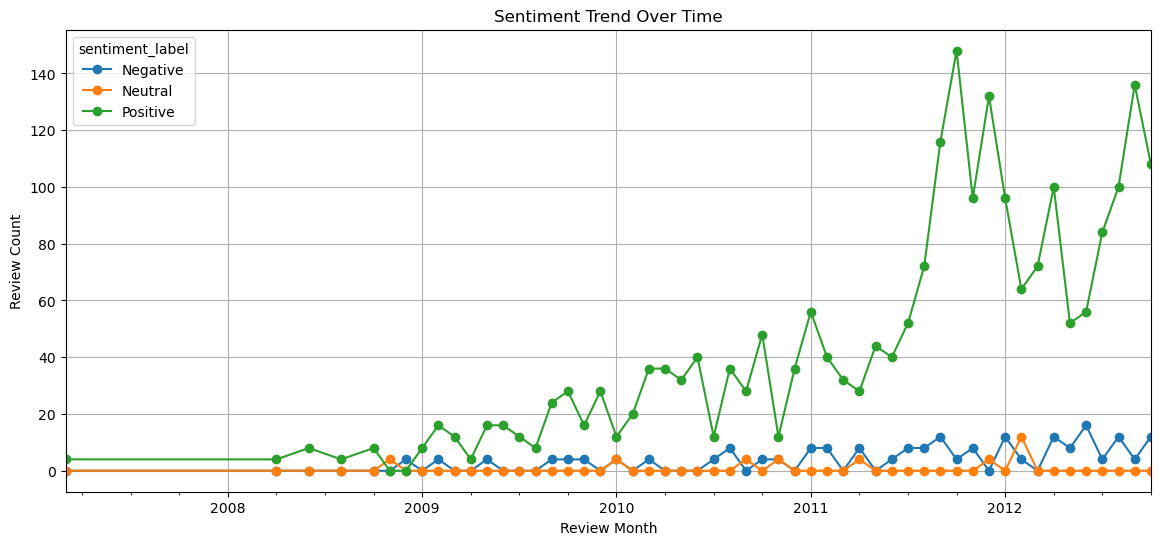

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab
monthly_sentiment = pd.crosstab(df_top10['review_month'], df_top10['sentiment_label'])

# Plot
monthly_sentiment.plot(kind='line', figsize=(14, 6), marker='o')
plt.title("Sentiment Trend Over Time")
plt.ylabel("Review Count")
plt.xlabel("Review Month")
plt.grid(True)
plt.show()


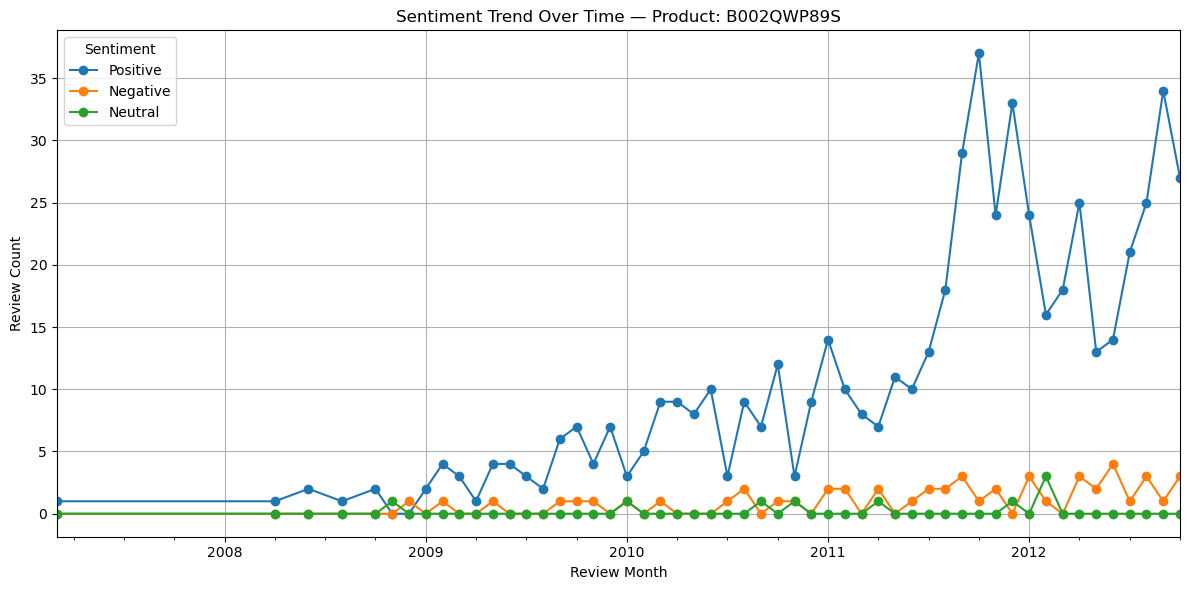

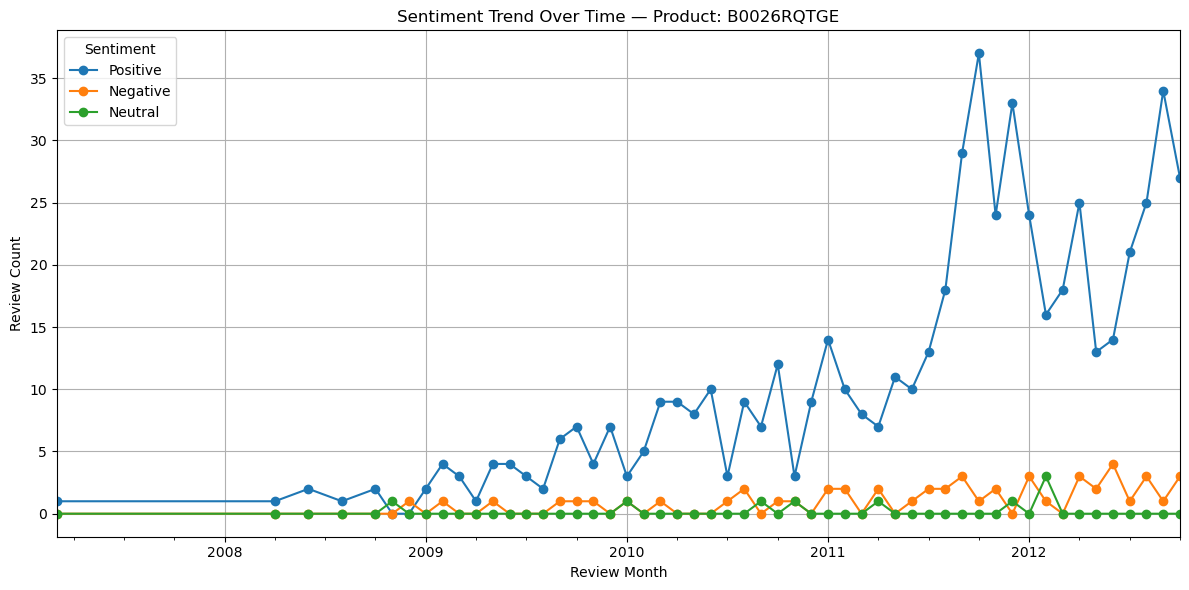

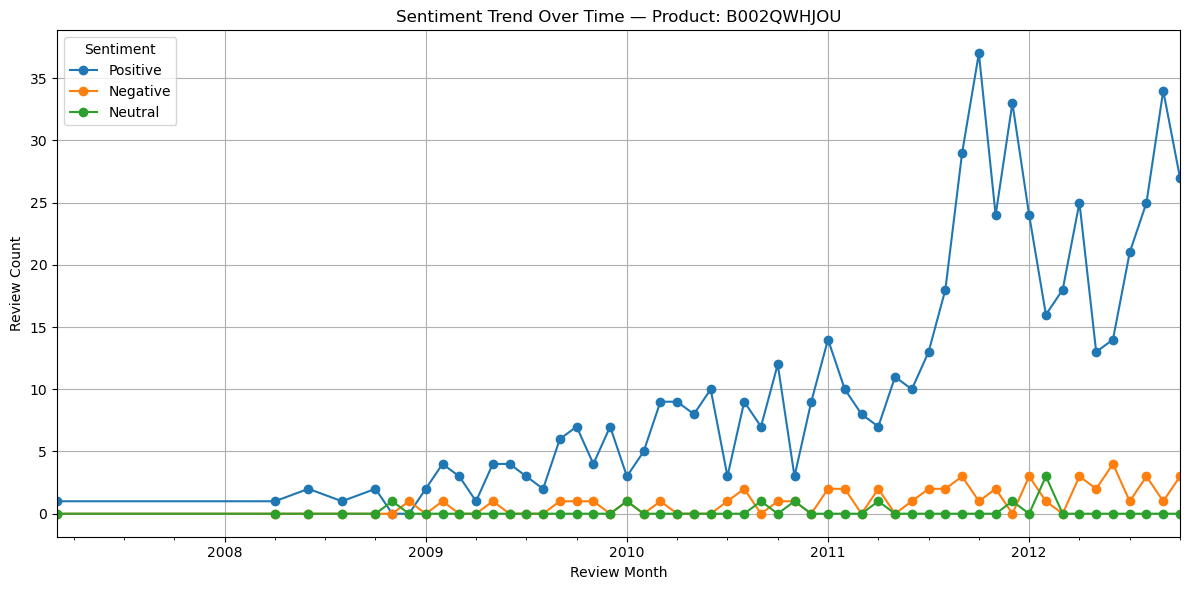

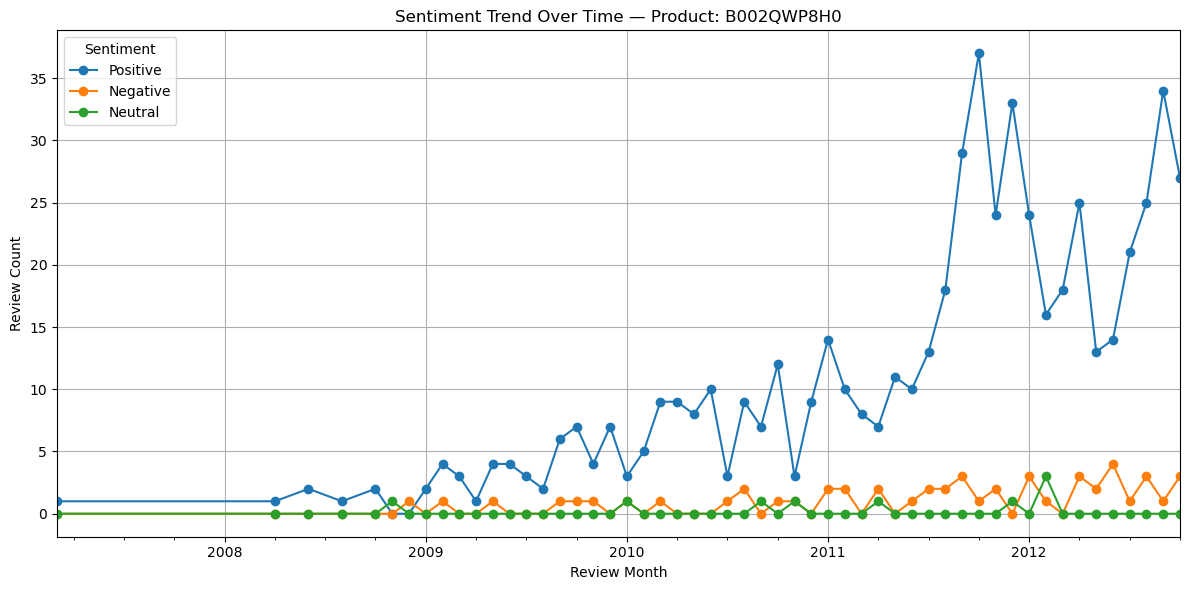

In [79]:
# Group by ProductId + Month + Sentiment
trend_data = (
    df_top10.groupby(['ProductId', 'review_month'])['sentiment_label']
    .value_counts()
    .unstack()
    .fillna(0)
    .reset_index()
)

# Now plot one product at a time
import matplotlib.pyplot as plt

top5_products = df_top10['ProductId'].value_counts().head(5).index.tolist()

for pid in top5_products:
    product_data = trend_data[trend_data['ProductId'] == pid].set_index('review_month')
    
    product_data[['Positive', 'Negative', 'Neutral']].plot(kind='line', figsize=(12, 6), marker='o')
    plt.title(f"Sentiment Trend Over Time — Product: {pid}")
    plt.ylabel("Review Count")
    plt.xlabel("Review Month")
    plt.grid(True)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()
